<a href="https://colab.research.google.com/github/Schristiansen1995/Proyecto_M7/blob/main/PROYECTO_FINAL_M7_SANTIAGO_CHRISTIANSEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se procede a realizar el primer paso para preparar el modelo, un EDA (Exploratory Data Analysis) con el fin de estudiar los datos previos a ejecutar un modelo, detectando outliers, patrones, entre otros.

FINALIDAD DEL PROYECTO: Crear un modelo de clasificacion para pronosticar caracteristicas que influyan en el resultado de una decision (en este caso, caractersticas y patrones que hagan ganador a una persona de un premio). Especificamente en este caso, en factor etnico en decadas pasadas.

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)

from functools import reduce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_Ucamp/PROYECTO_M7/Oscars-demographics-DFE.csv", encoding = "latin-1")

In [ ]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [ ]:
df.shape

(441, 27)

1. Se procede a realizar el primer paso para preparar el modelo, un EDA (Exploratory Data Analysis) con el fin de estudiar los datos previos a ejecutar un modelo, detectando outliers, patrones, entre otros.

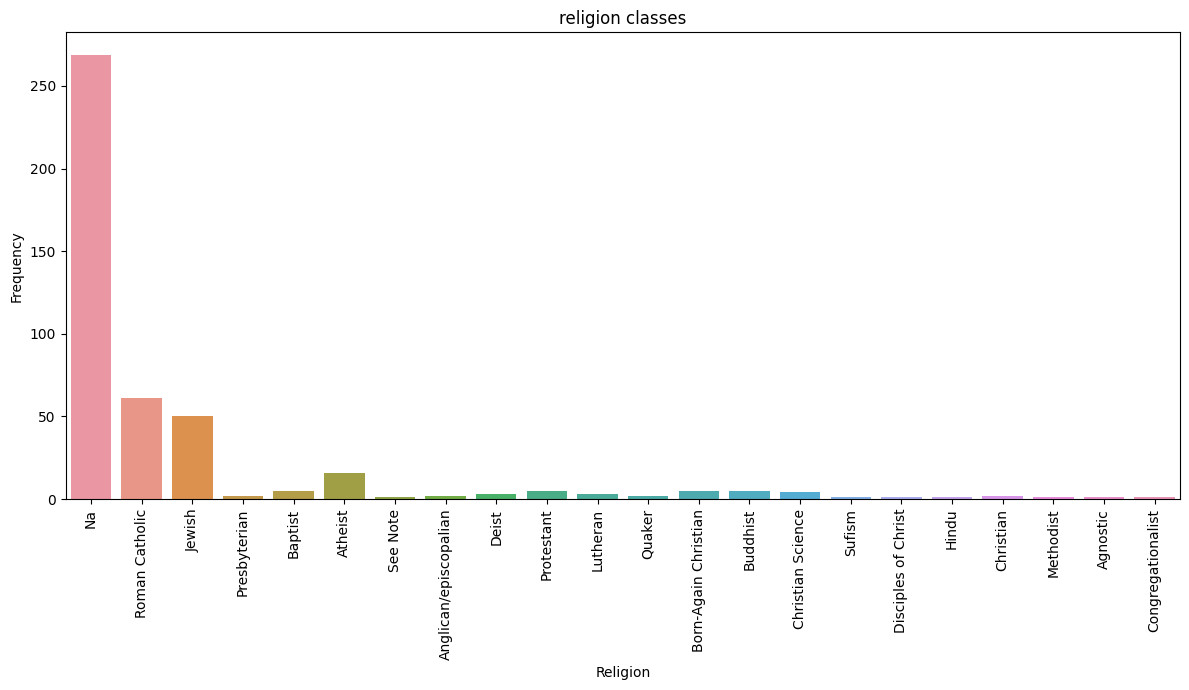

In [ ]:
# Grafica sobre la religion de los participantes

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='religion')
plt.xlabel('Religion')
plt.ylabel('Frequency')
plt.title('religion classes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Como se puede apreciar en la grafica, los participantes se abstienen de responder la pregunta, dejandola sin responder.

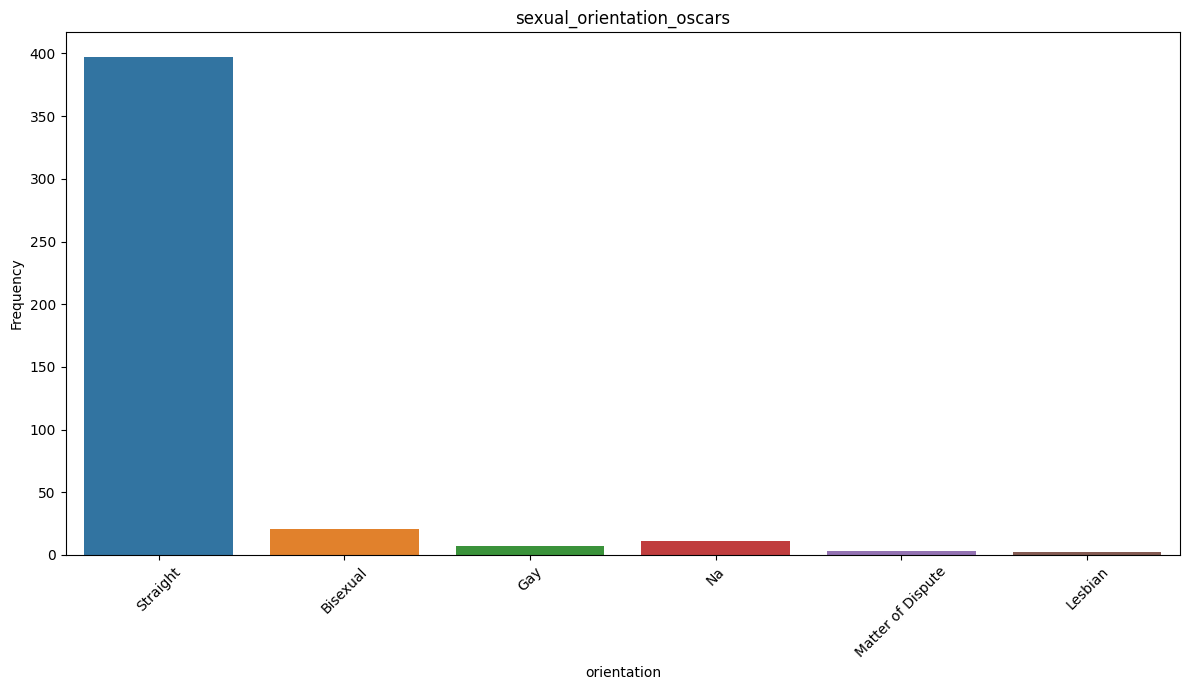

In [ ]:
# Grafica sobre la orientacion sexual de los participantes

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='sexual_orientation')
plt.xlabel('orientation')
plt.ylabel('Frequency')
plt.title('sexual_orientation_oscars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

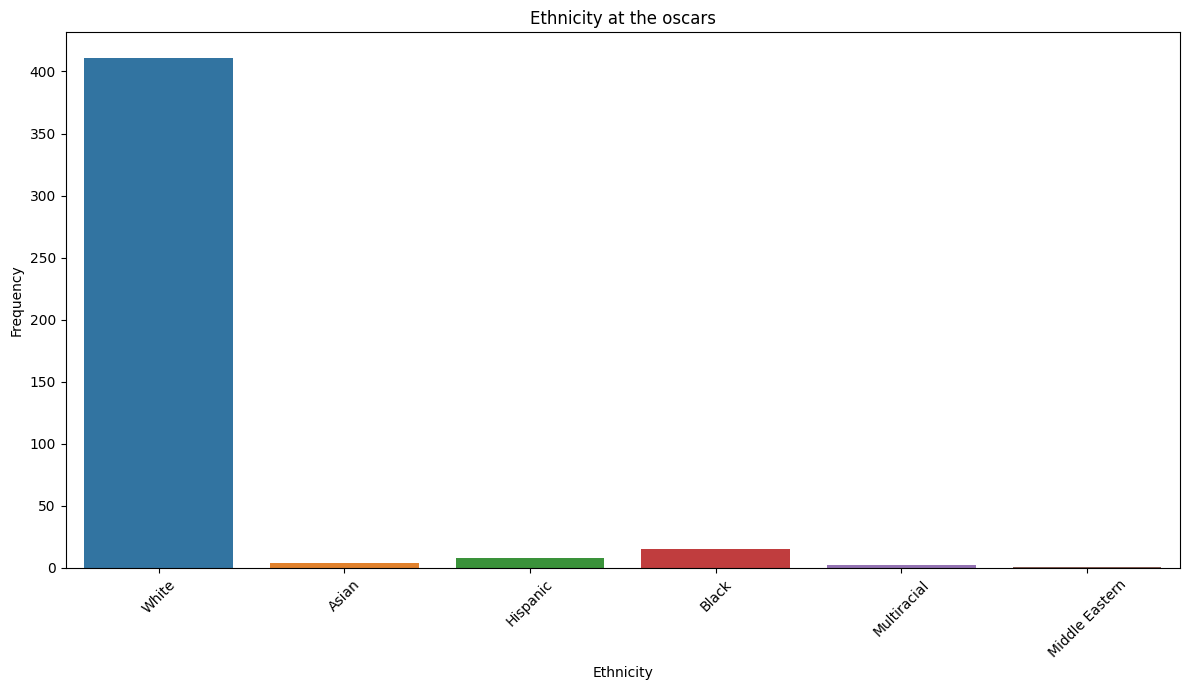

In [ ]:
# Grafica sobre la orientacion sexual de los participantes

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='race_ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Ethnicity at the oscars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# df['race_ethnicity', 'year_of_award'].value_counts()

In [ ]:
df['race_ethnicity'].value_counts()

White             411
Black              15
Hispanic            8
Asian               4
Multiracial         2
Middle Eastern      1
Name: race_ethnicity, dtype: int64

In [ ]:
df.filter(like="confidence").tail(20)

,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award:confidence
421,1.0,1.0,1.0,1.0,1.0,1.0000
422,1.0,1.0,1.0,1.0,1.0,1.0000
423,1.0,1.0,1.0,1.0,1.0,1.0000
424,1.0,1.0,1.0,1.0,1.0,1.0000
425,1.0,1.0,1.0,1.0,1.0,1.0000
426,1.0,1.0,1.0,1.0,1.0,1.0000
427,1.0,1.0,1.0,1.0,1.0,1.0000
428,1.0,1.0,1.0,1.0,1.0,1.0000
429,1.0,1.0,1.0,1.0,1.0,1.0000
430,1.0,1.0,1.0,1.0,1.0,1.0000


Se puede apreciar que:
Un 93% de los ganadores de este importante premio pertenecen a

1. Un 93% de los ganadores de este importante premio pertenecen a la etnia blanca, el 7% restante esta compuesto de etnias como hispanos, asiaticos, afro, entre otros.

2. Los datos obtenidos por parte de las columnas de confianza registran datos que traen como consecuencia un gran sesgo.

3. Un 90% de la poblacion registrada en el Dataset son heterosexuales, el 10% restantes se divide entre homosexuales, bisexuales, entre otros.

2. Se procede a realizar la limpieza de datos del dataset.

In [ ]:
# Se determina la completitud
completitud = pd.DataFrame(df.isnull().sum())

# Se resetea el orden de las columnas para un mejor entendimiento
completitud.reset_index(inplace = True)

# Se les asigna un headline
completitud = completitud.rename(columns = {"index":"columna",0:"total"})

# Se crea una nueva columna llamada "Completitud_2" tomando la formula
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100

# Se organiza de mayor a menor y se resetean de nuevo los indices
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud.head(20)

,columna,total,completitud
0,race_ethnicity_gold,439,0.453515
1,sexual_orientation_gold,438,0.680272
2,date_of_birth_gold,433,1.814059
3,birthplace_gold,432,2.040816
4,religion_gold,431,2.267574
5,year_of_award_gold,430,2.494331
6,_last_judgment_at,25,94.331066
7,person,0,100.000000
8,movie,0,100.000000
9,biourl,0,100.000000


A ojo se puede sacar la siguiente conclusion: Todas las columnas cuyo headline termina en gold son las que mas datos faltantes tienen. Ademas, son columnas cuya informacion no es relevante para la finalidad del modelo.

In [ ]:
# Se clasifican las columnas según sus tipos de datos y variables:

# Variables discretas

v_feats=['_unit_state', '_trusted_judgments','_last_judgment_at', 'birthplace',
        'birthplace:confidence', 'date_of_birth', 'date_of_birth:confidence',
      'race_ethnicity', 'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', '_golden', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold']

# Variables continuas

c_feats=['_unit_id']

# Variable Tgt

tgt=['award']

Se determino la columna **'award'** como target gracias a que es aquella que nos
demuesta un resultado teniendo en cuenta la combinacion y el resultado de las
anteriores variables. Como es de esperar, esta es la variable la cual demuestra la condicion final esperada, en este caso, si es ganador o no.

Se procede a eliminar las variables cuya completitud sea inferior a 80%

In [ ]:
# Se eliminan a traves de la herramienta df.drop

drop_columns = completitud[completitud["completitud"] < 80]["columna"]
df = df.drop(columns=drop_columns)
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'movie', 'person'],
      dtype='object')

Se procede a aplicarle a 3 columnas dummies para que estras reflejen un dato binario. Estas columnas son raza, religion y orientacion sexual.

Observacion: Se pensaba colocar tambien como dummie la columna **year**, sin embargo, se haria muy extenso el dataset debido a la gran cantidad de years.

In [ ]:
df = pd.get_dummies(data=df, columns=['race_ethnicity',
                                      'religion',
                                      'sexual_orientation',])

In [ ]:
df.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,movie,person,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,religion_Agnostic,religion_Anglican/episcopalian,religion_Atheist,religion_Baptist,religion_Born-Again Christian,religion_Buddhist,religion_Christian,religion_Christian Science,religion_Congregationalist,religion_Deist,religion_Disciples of Christ,religion_Hindu,religion_Jewish,religion_Lutheran,religion_Methodist,religion_Na,religion_Presbyterian,religion_Protestant,religion_Quaker,religion_Roman Catholic,religion_See Note,religion_Sufism,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Na,sexual_orientation_Straight
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,1.0,1.0,1.0000,1927,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,1.0,1.0,0.6842,1930,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,1.0,1.0,1.0000,1931,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,All Quiet on the Western Front,Lewis Milestone,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,1.0,1.0,1.0000,1932,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,Skippy,Norman Taurog,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,1.0,1.0,1.0000,1933,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,Bad Girl,Frank Borzage,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,670454358,False,finalized,3,2/10/15 3:50,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,1.0,1.0,1.0000,1934,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,Cavalcade,Frank Lloyd,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,670454359,False,finalized,3,2/10/15 2:07,"Bisacquino, Sicily, Italy",1.0,18-May-1897,1.0,1.0,1.0,1.0000,1935,1.0000,Best Director,http://www.nndb.com/people/459/000032363/,It Happened One Night,Frank Capra,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7,670454360,False,finalized,3,2/10/15 1:46,"Cape Elizabeth, Me",1.0,1-Feb-1894,1.0,1.0,1.0,1.0000,1936,1.0000,Best Director,http://www.nndb.com/people/458/000032362/,The Informer,John Ford,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,670454361,False,finalized,3,2/10/15 1:47,"Bisacquino, Sicily, Italy",1.0,18-May-1897,1.0,1.0,1.0,1.0000,1937,1.0000,Best Director,http://www.nndb.com/people/459/000032363/,Mr. Deeds Goes to Town,Frank Capra,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,670454362,False,finalized,3,2/10/15 2:05,"Los Angeles, Ca",1.0,3-Oct-1898,1.0,1.0,1.0,1.0000,1938,1.0000,Best Director,http://www.nndb.com/people/380/000044248/,The Awful Truth,Leo McCarey,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Por ultimo, se convoca el label encoder para tranformar en numero la columna

In [ ]:
label_encoder = LabelEncoder()

Se aplica en el Tgt

In [ ]:
df['award_encoded'] = label_encoder.fit_transform(df['award'])

In [ ]:
unique_df = df[['award', 'award_encoded']].drop_duplicates()
print(unique_df)

                       award  award_encoded
0              Best Director              2
87                Best Actor              0
173    Best Supporting Actor              3
251             Best Actress              1
338  Best Supporting Actress              4


Nota: Inicialmente se habia escogido la variable **_Golden** como tgt, sin embargo,

Se procede a eliminar columnas cuya informacion no sea relevante a traves de la funcion Df.drop.

In [ ]:
df.drop(['_unit_id', '_unit_state', '_trusted_judgments','_last_judgment_at', 'birthplace',
        'birthplace:confidence', 'date_of_birth', 'date_of_birth:confidence',
        '_golden', 'biourl', 'movie', 'person', 'sexual_orientation_Na',
         'religion_Na'], axis=1, inplace=True)

In [ ]:
# Se comprueba la eliminacion de columnas con un shape

df.shape

(441, 39)

3. Entrenamiento del modelo de *Machine Learning.*

En este caso se escoge el **modelo de clasificacion de arboles de decision** gracias a que este modelo:

1. Con el podemos manejar tanto datos categoricos como numericos.

2. Permite agregar y quitar datos e ideas, generando ramificaciones.

3. Ayuda a identificar patrones de especificas combinaciones para predecir ya sean tendencias o anticipar decisiones futuras.

Nota Se pensaba usar VarClust, sin embargo, al tener unos datos tan sesgado no se podria aplicar reduccion de dimensiones.

Como primer paso, se convocan las siguientes librerias    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tambien se convocan las siguientes de SKlearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

Se definen las variables dependientes de la variable independiente (Tgt)

In [ ]:
X = df.drop(['race_ethnicity:confidence', 'religion:confidence',
             'sexual_orientation:confidence'], axis=1)

y = df['award_encoded']

In [ ]:
df['award']

0                Best Director
1                Best Director
2                Best Director
3                Best Director
4                Best Director
                ...           
436    Best Supporting Actress
437              Best Director
438      Best Supporting Actor
439      Best Supporting Actor
440              Best Director
Name: award, Length: 441, dtype: object

Para unas buenas practicas, se usa la **X** mayuscula y la **y** minuscula para el modelo de entrenamiento.

In [ ]:
# Se procede a clasificar datos de entrenamiento y de prueba:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,
                                                    random_state=60)

Se crea y se entrena el modelo de arboles de decision

In [ ]:
X_train

,year_of_award,year_of_award:confidence,award,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,religion_Agnostic,religion_Anglican/episcopalian,religion_Atheist,religion_Baptist,religion_Born-Again Christian,religion_Buddhist,religion_Christian,religion_Christian Science,religion_Congregationalist,religion_Deist,religion_Disciples of Christ,religion_Hindu,religion_Jewish,religion_Lutheran,religion_Methodist,religion_Presbyterian,religion_Protestant,religion_Quaker,religion_Roman Catholic,religion_See Note,religion_Sufism,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Straight,award_encoded
2,1931,0.6667,Best Director,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
334,2011,1.0000,Best Actress,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
396,1995,1.0000,Best Supporting Actress,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
414,2013,1.0000,Best Supporting Actress,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
339,1938,1.0000,Best Supporting Actress,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1998,1.0000,Best Supporting Actress,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
394,1993,1.0000,Best Supporting Actress,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
70,1997,1.0000,Best Director,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
65,1992,1.0000,Best Director,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [ ]:
# transformador = OneHotEncoder

# enc_df = pd.DataFrame(transformador.fit_transform(df[['award']]).toarray())
# df = df.join(enc_df)

In [ ]:
model = RandomForestClassifier(random_state=60)
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
## modelo_knn = KNeighborsClassifier(n_neighbors= 12)

4. Graficas y metricas de rendimiento

Se procede a realizar las siguientes metricas de clasificacion

*   CURVA ROC
*   CURVA AUC
*   MATRIZ DE CONFUSION
*   F1



Se convocan las siguientes librerias para aplicar los graficos:

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report

Empezamos con la curva ROC y AUC.

Antes, para generar una clasificacion multiclase se recurre a crear etiquetas binarias.

In [ ]:
y_bin = label_binarize(y_test, classes=model.class_)

F1: Se predice el conjunto y_pred

In [ ]:
y_pred = model.predict(X_test)

Se calcula el F1 por clase

In [ ]:
f1_scores = f1_scores(y_test, y_pred, average=None)

Se opta por usar la herramienta uno versus todos» (one-vs-all) para realizar una clasificacion multietiqueta.

Por ultimo, se evalua la precision de la curva ROC y AUC.

In [ ]:
roc_auc = dict()

for i in range(len(model.class_)):
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_score[:, i])

In [ ]:
classifier = OneVsRestClassifier(model)

y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

Por ultimo, generamos matriz de confusion

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="YlGnBu")
plt.figure(figsize=(12, 9))
plt.title('Confusion_matrix')
plt.ylabel('Current')
plt.xlabel('Predicted')

5. API REST:

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import requests

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hola Mundo!</p>"